<a href="https://colab.research.google.com/github/giangervasoni/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales analysis from a bike store**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
sales = pd.read_csv(
    '/content/sales_data.csv',
    parse_dates=['Date'])

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [6]:
mean_customer_age = round(sales['Customer_Age'].mean(), 2)
sd_mean_customer_age = round(sales['Customer_Age'].std(), 2)

print(mean_customer_age, sd_mean_customer_age)

35.92 11.02


In [7]:
round(sales['Customer_Age'].median(), 2)

35.0

<Axes: ylabel='Density'>

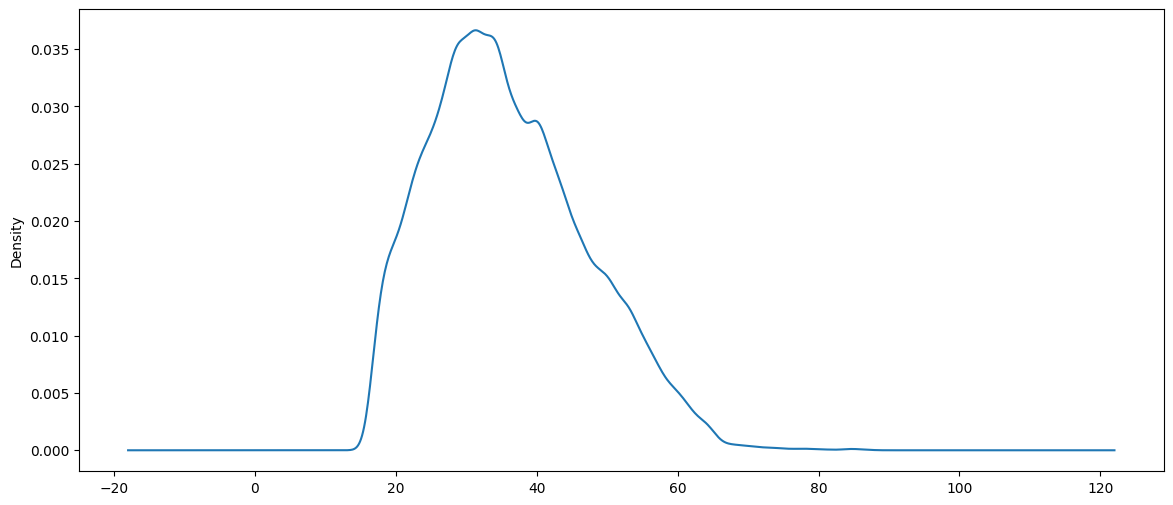

In [8]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

<Axes: ylabel='Frequency'>

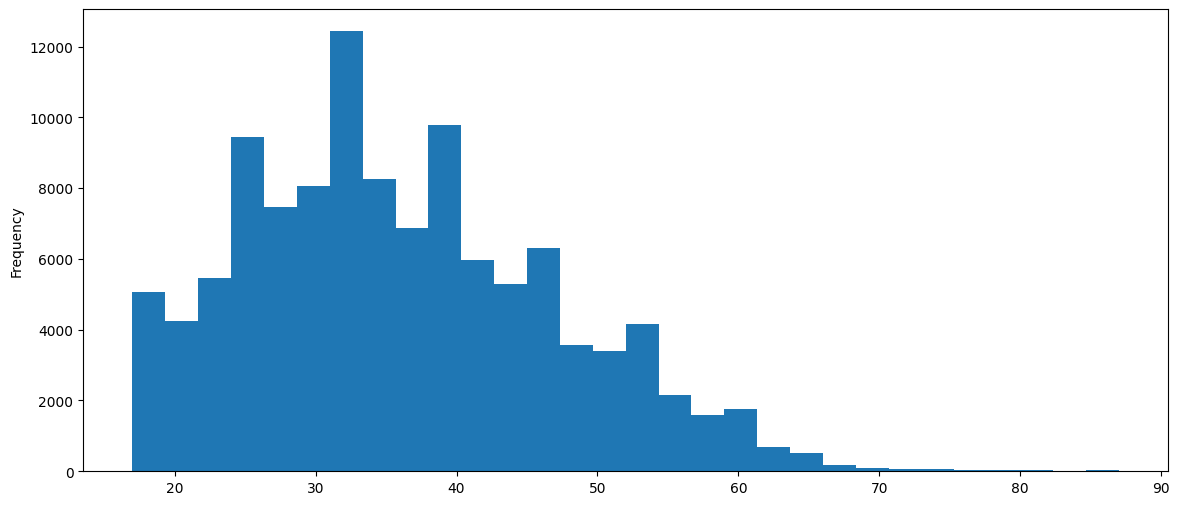

In [9]:
sales['Customer_Age'].plot(kind='hist', bins=30, figsize=(14,6))

The mean and median age of the customers of the bike store are very similar. The mean age of customers is 35 years old. Almost 2/3 of all customers (1 sigma) are 24 to 46 years old.

<Axes: >

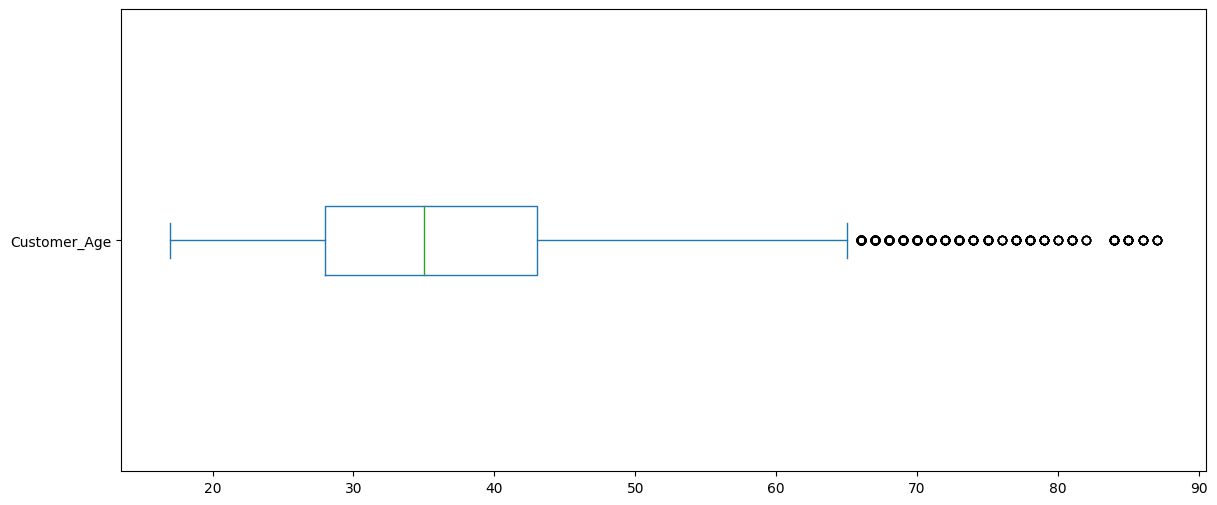

In [10]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

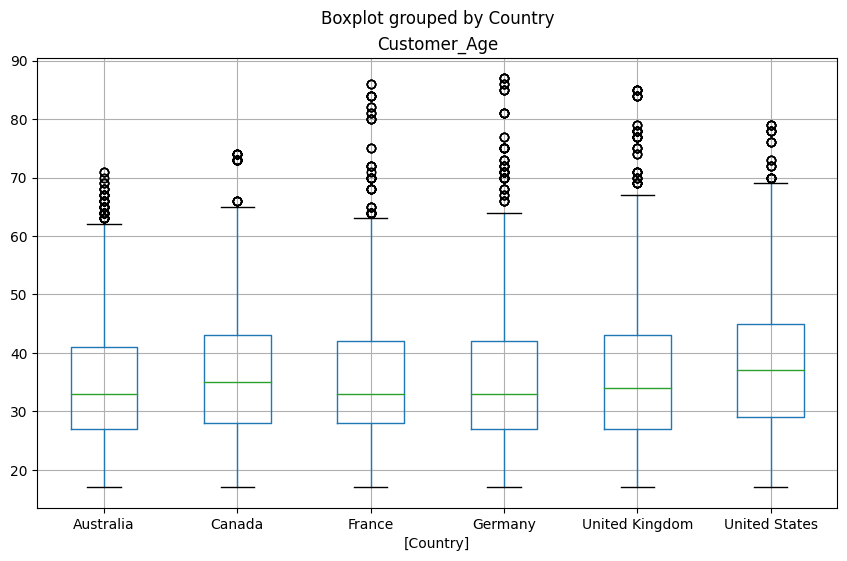

In [84]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

From this box plot, we can graphically show what we could've estimated beforehand, this is that kids don't have enough saving to buy their own bikes, and hypothesize that their bikes are bought by their parents, but also that seniors (65 and above) also are into cycling, but are not the main target population for advertising. 

In [11]:
mean_order_quantity = round(sales['Order_Quantity'].mean(), 2)
sd_mean_order_quantity = round(sales['Order_Quantity'].std(), 2)

print(mean_order_quantity, sd_mean_order_quantity)

11.9 9.56


<Axes: ylabel='Frequency'>

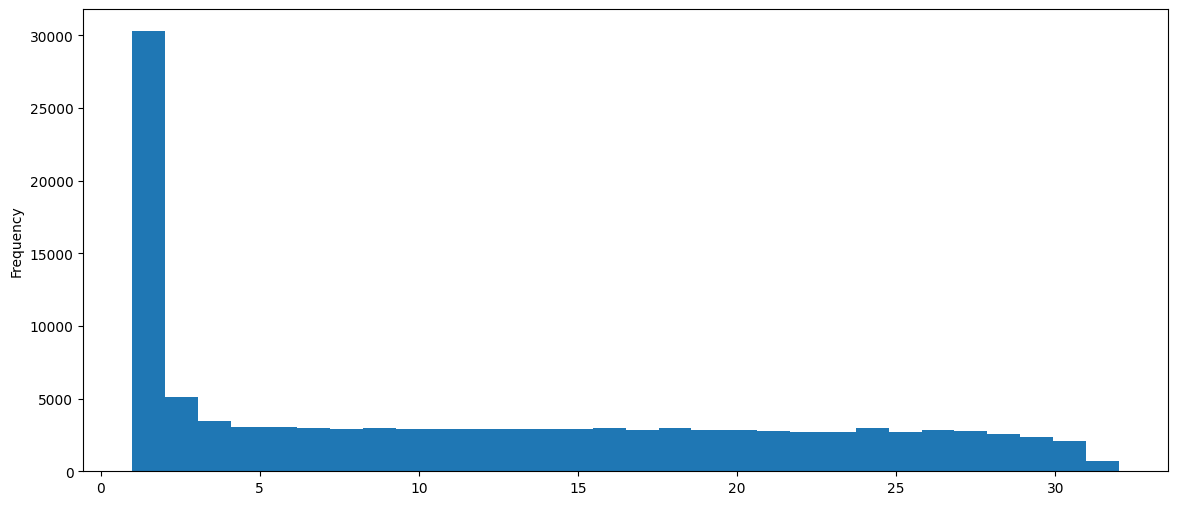

In [12]:
sales['Order_Quantity'].plot(kind='hist', bins = 30, figsize=(14,6))

<Axes: >

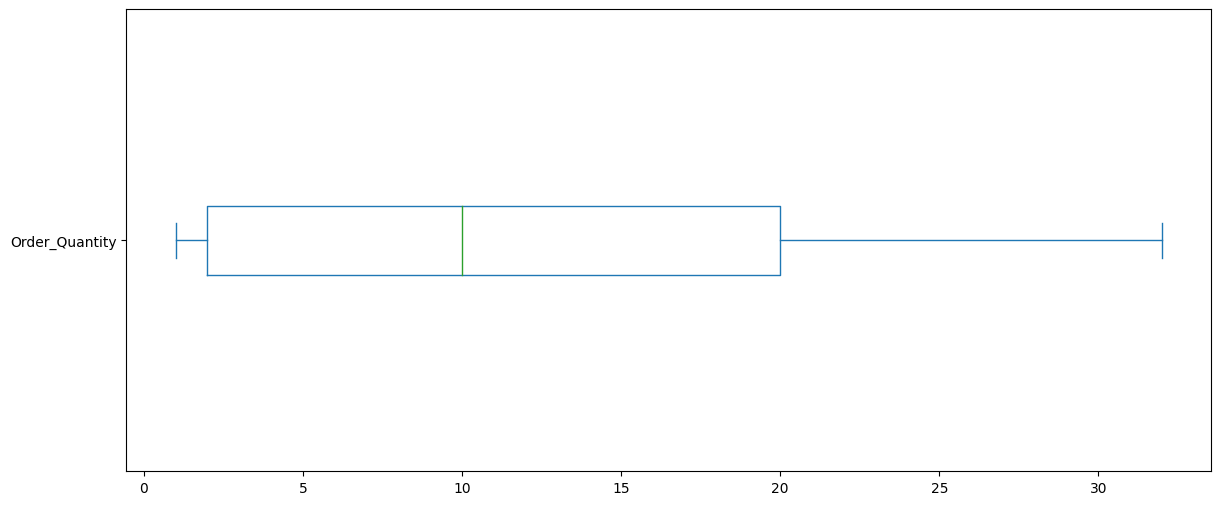

In [13]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

In [14]:
round(sales['Order_Quantity'].median(), 2)

10.0

From what we can see on the box plot and the mean and SD calculation, the quantity of orders is aroound 12. However, when we have a look at the histogram and the median, we can appreciate that the values are skewed to the left. Meaning, that half of all customers buy, at most, 10 items.

In [15]:
sales['Year'].value_counts().sort_index(ascending=False)

2016    29398
2015    24443
2014    29398
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<Axes: ylabel='Year'>

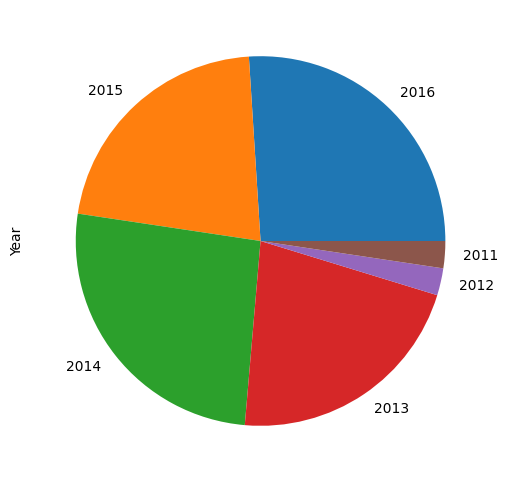

In [16]:
sales['Year'].value_counts().sort_index(ascending=False).plot(kind='pie', figsize=(6,6))

<Axes: >

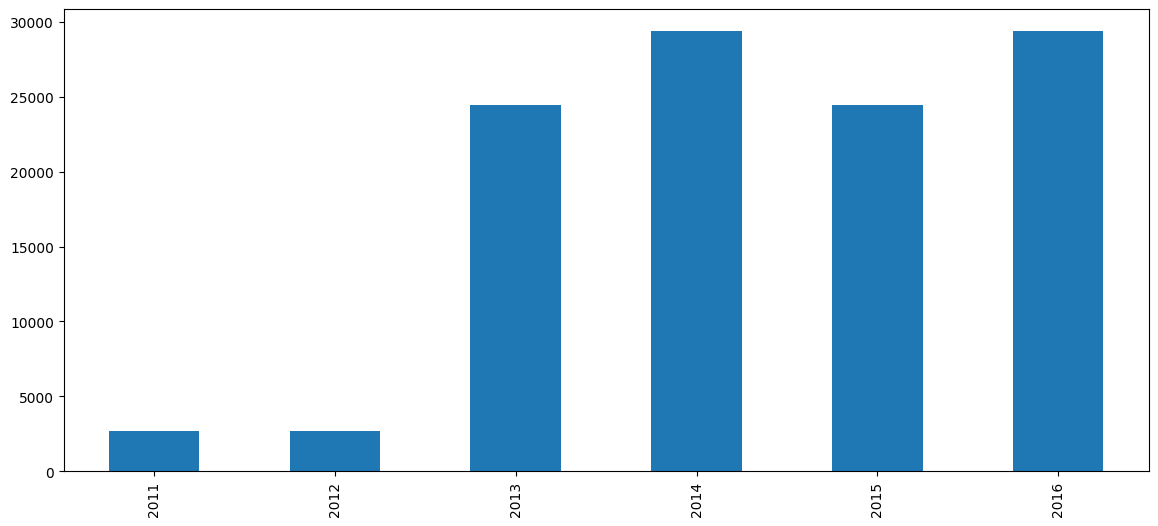

In [17]:
sales['Year'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(14,6))

We can see something really strange. 2011 and 2012 have the exact number of sales. 2013 and 2015 also have the same number of sales. The same is true for 2014 and 2016. This can be a coincidence, but seems off.

In [20]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<Axes: >

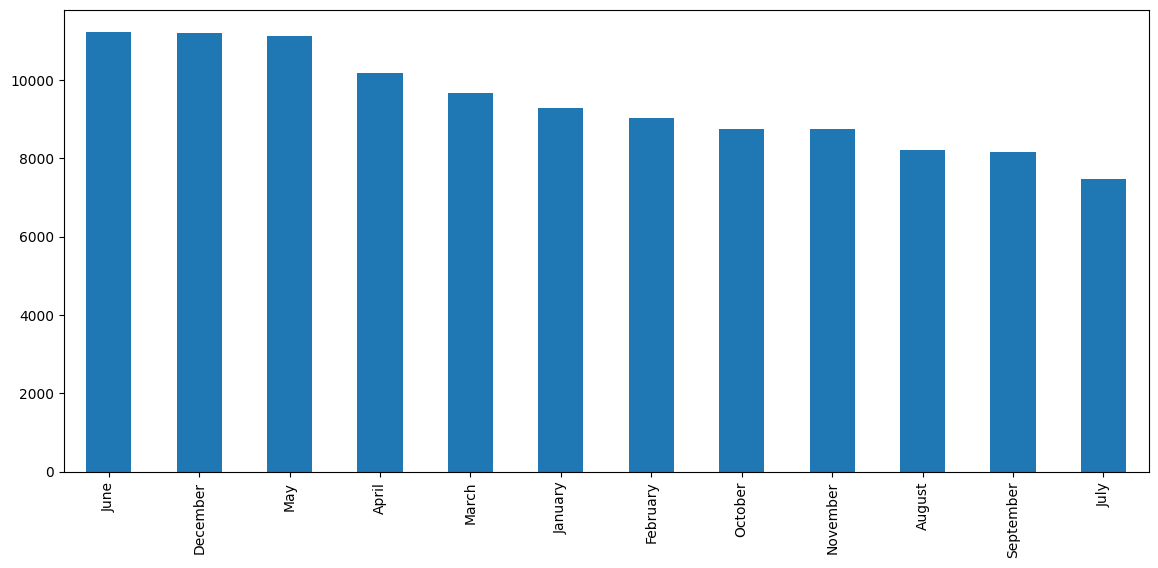

In [25]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

In [87]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [88]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

<Axes: >

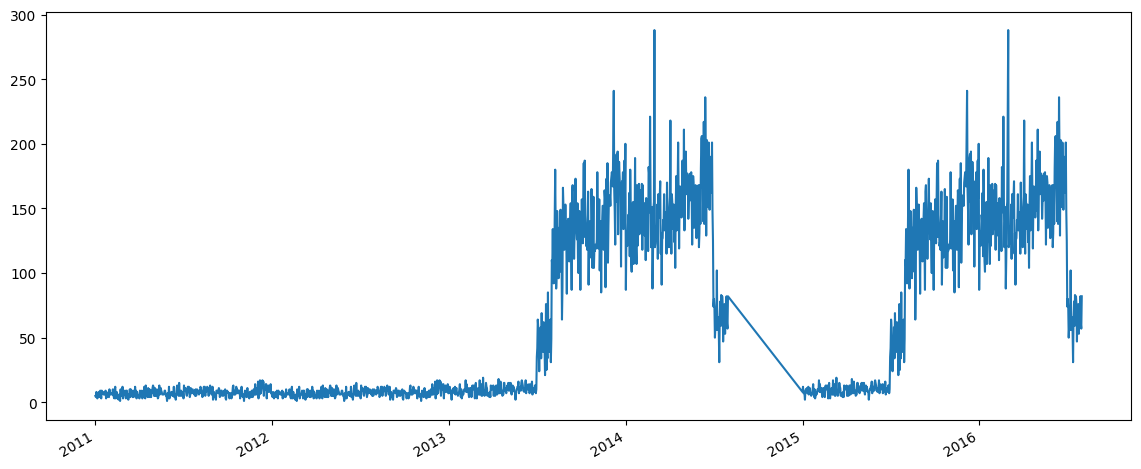

In [89]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

The second trimester of the year (April, May, June) is where most sales are made. December is also a high sales month. On the other hand, November, August, September and July are the ones where the least sales take place.

From the last plot, we can see that there are two spikes (from mid 2013 to mid 2014, and from mid 2015 to mid 2016).

In [26]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

In [27]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

<Axes: >

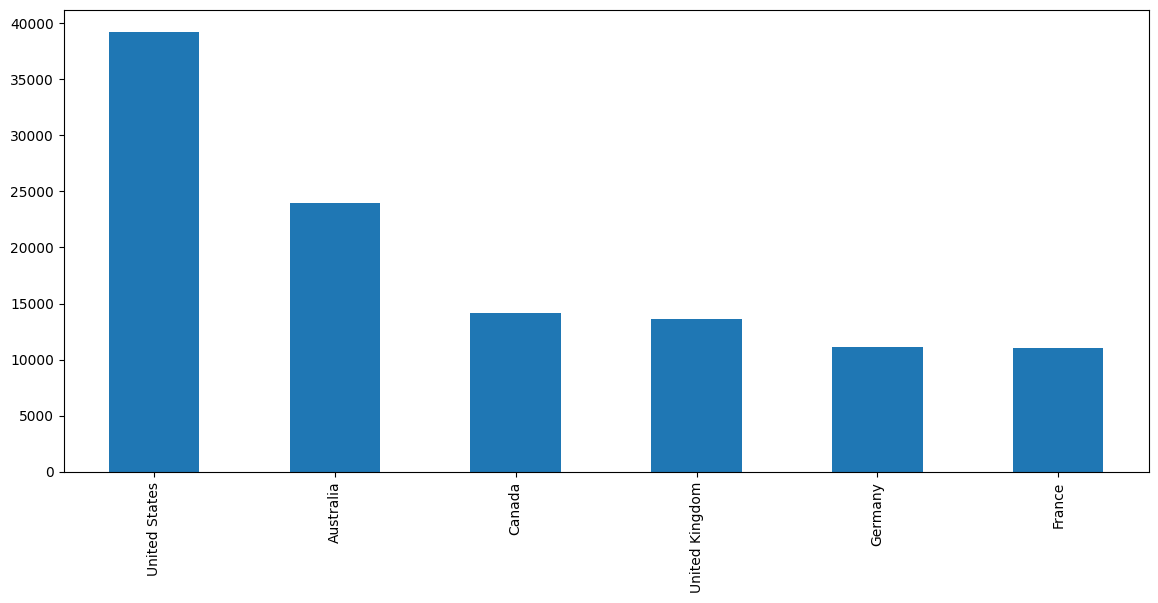

In [28]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

The country with the most amount of sales is the US. Second is Australia, 'tied' in third are Canada and the UK. Last are Germany and France.

We can see that bikes are not being sold in Europe as much as in North America and Australia

In [31]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<Axes: >

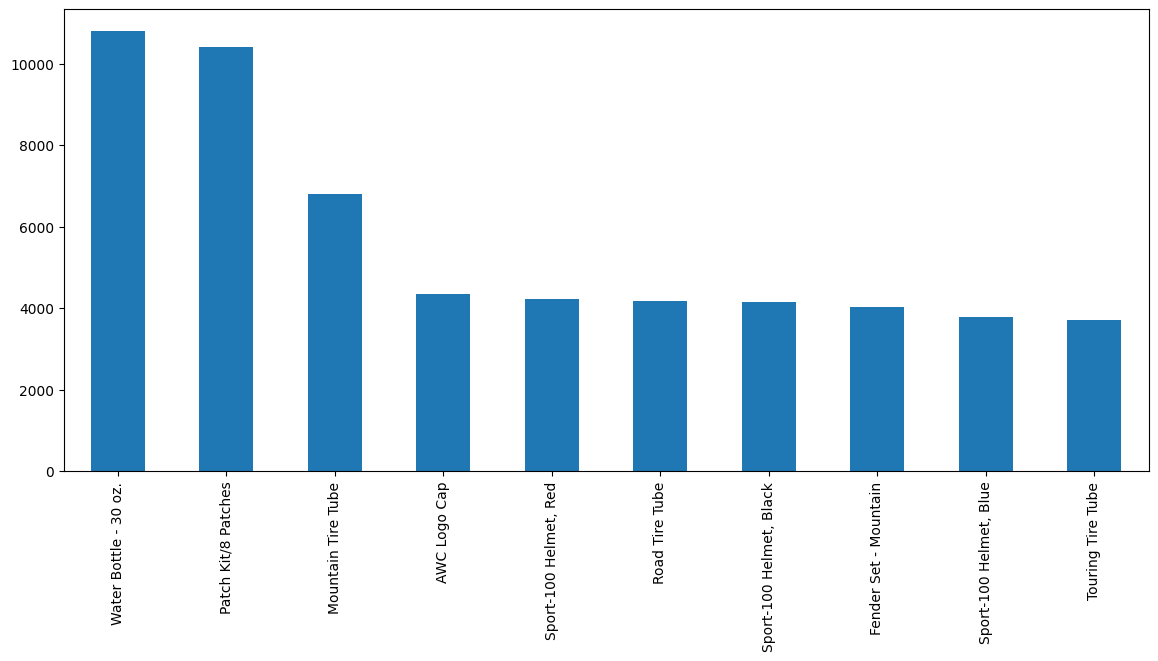

In [34]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

In [38]:
sales['Product'].value_counts().head(3)

Water Bottle - 30 oz.    10794
Patch Kit/8 Patches      10416
Mountain Tire Tube        6816
Name: Product, dtype: int64

In [48]:
sales['Product'].value_counts()

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

From all the products available, the 30 oz. water bottle, the patch kit and the mountain tire tube are the best sellers. Mountain-100, Mountain-500 and Road-650 are the least sold products.

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

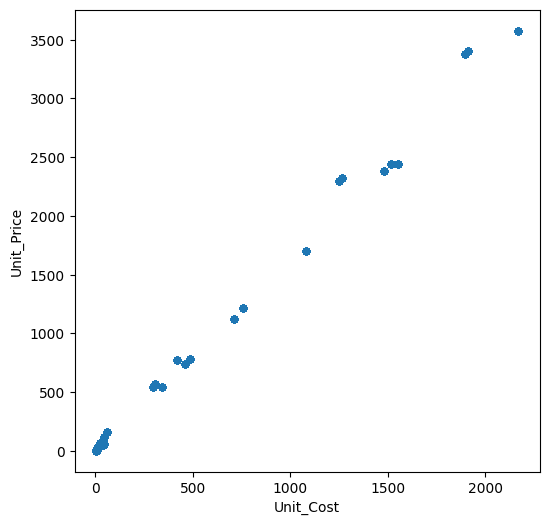

In [51]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

Text(0, 0.5, 'Unit price')

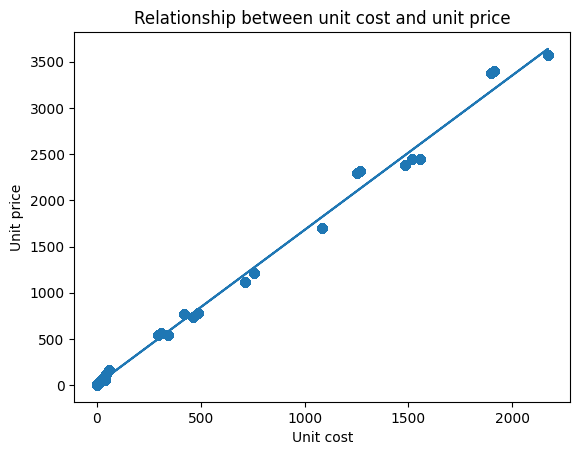

In [65]:
x = sales['Unit_Cost']
y = sales['Unit_Price']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))

from sklearn.metrics import r2_score

plt.title('Relationship between unit cost and unit price')
plt.xlabel('Unit cost')
plt.ylabel('Unit price')

As expected, the price of a product and its cost is related.

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

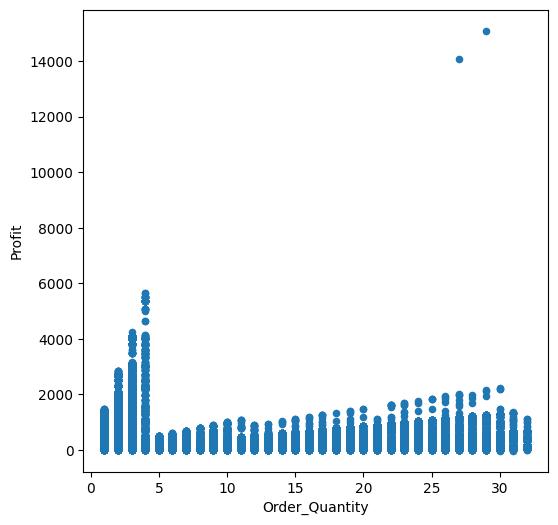

In [67]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

The orders that drive the most amount of profits are between 1 and 5 items per purchase. After five items, there is a positive linear relationship between number of items purchased and profit. 

There are 2 outliers that will require further analysis.

Text(0, 0.5, 'Profit')

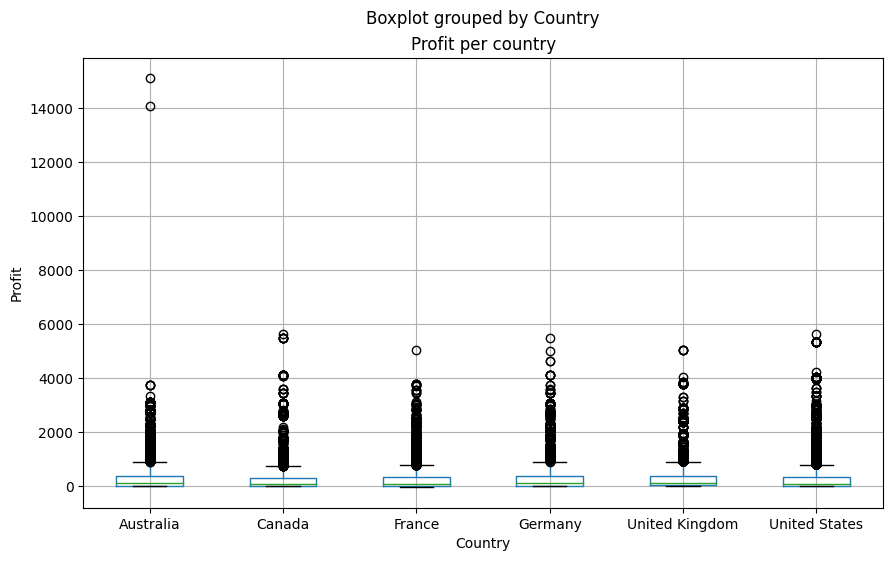

In [72]:
sales[['Profit','Country']].boxplot(by='Country', figsize=(10,6))

plt.title('Profit per country')
plt.xlabel('Country')
plt.ylabel('Profit')

In [83]:
round(sales['Profit'].value_counts().groupby(by=sales['Country']).mean(), 2)

Country
Australia          92.37
Canada            138.91
France             67.22
Germany            62.61
United Kingdom     45.22
United States      94.72
Name: Profit, dtype: float64

Profit per country appear similar between countries, with similar distribution of the data points. The exception is Australia, showing two outliers.

The mean profit per country is highest in Canada, followed by Australia and the US (with similar values). Germany has the minium value.

In [92]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<Axes: >

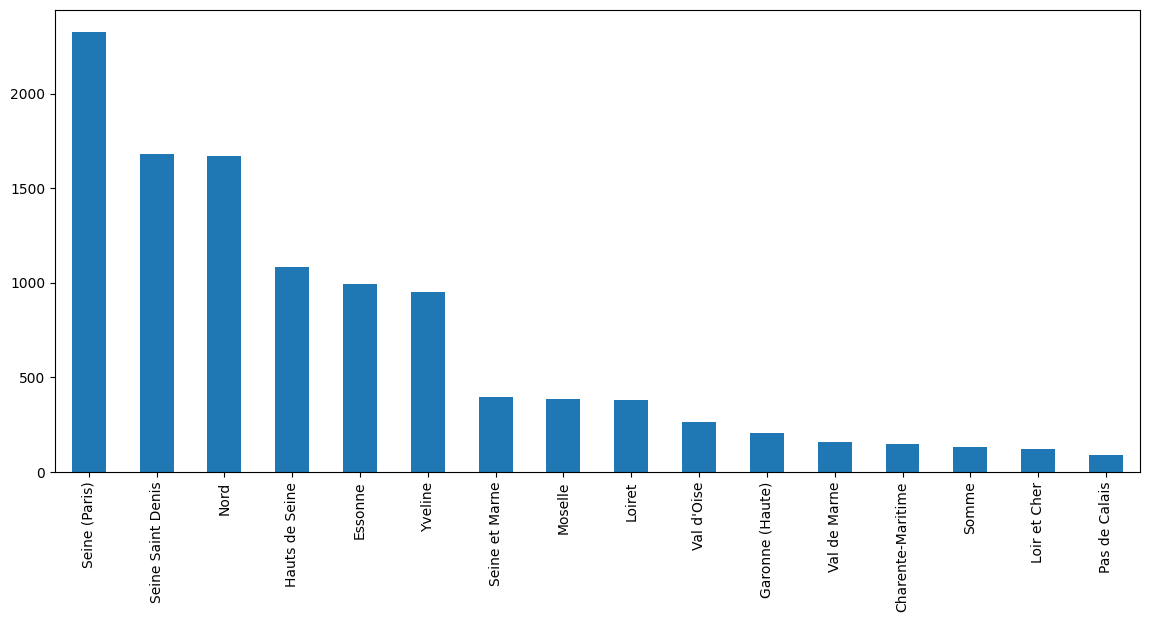

In [93]:
france_states.plot(kind='bar', figsize=(14,6))

In [94]:
australia_states = sales.loc[sales['Country'] == 'Australia', 'State'].value_counts()

australia_states

New South Wales    10412
Victoria            6016
Queensland          5220
South Australia     1564
Tasmania             724
Name: State, dtype: int64

<Axes: >

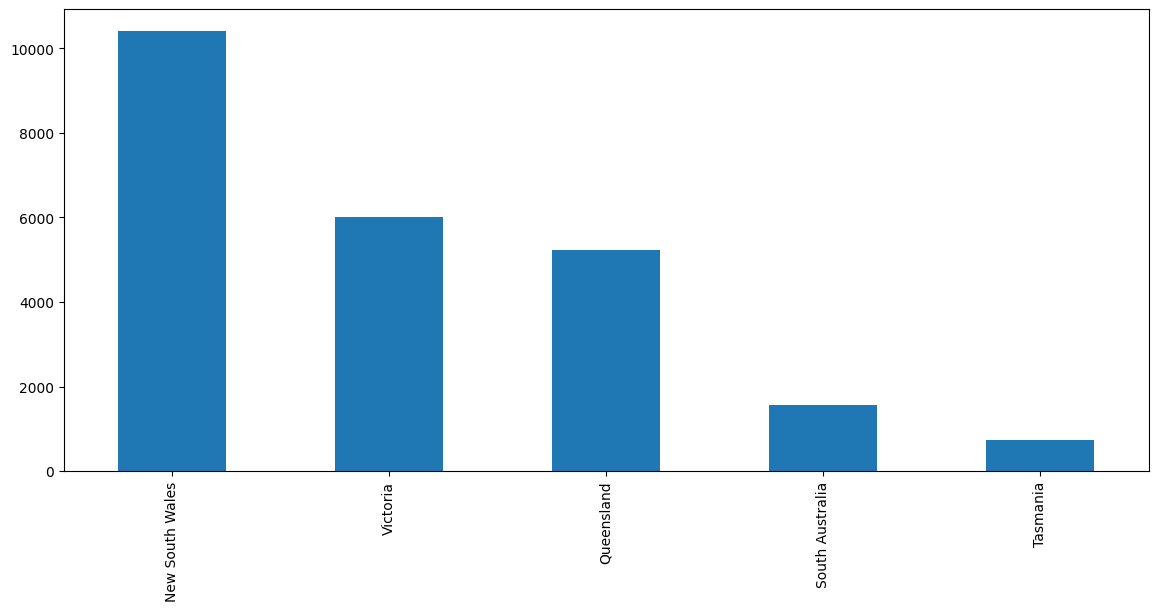

In [96]:
australia_states.plot(kind='bar', figsize=(14,6))

In [97]:
canada_states = sales.loc[sales['Country'] == 'Canada', 'State'].value_counts()

canada_states

British Columbia    14116
Alberta                56
Ontario                 6
Name: State, dtype: int64

<Axes: >

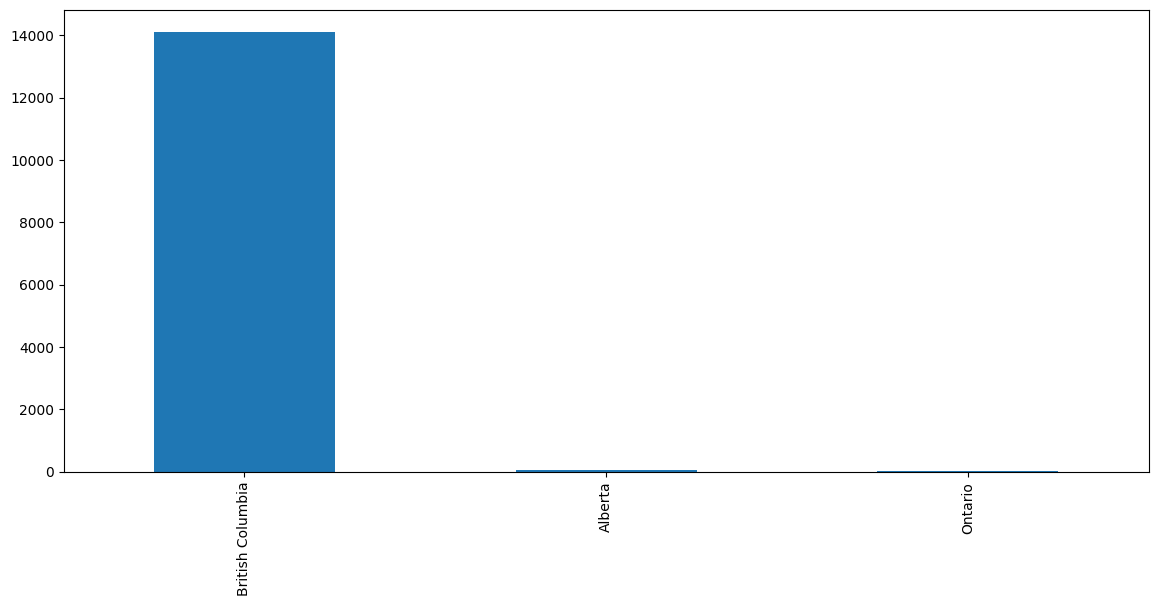

In [98]:
canada_states.plot(kind='bar', figsize=(14,6))

In [99]:
germany_states = sales.loc[sales['Country'] == 'Germany', 'State'].value_counts()

germany_states

Saarland               2770
Nordrhein-Westfalen    2484
Hessen                 2384
Hamburg                1836
Bayern                 1426
Brandenburg             198
Name: State, dtype: int64

<Axes: >

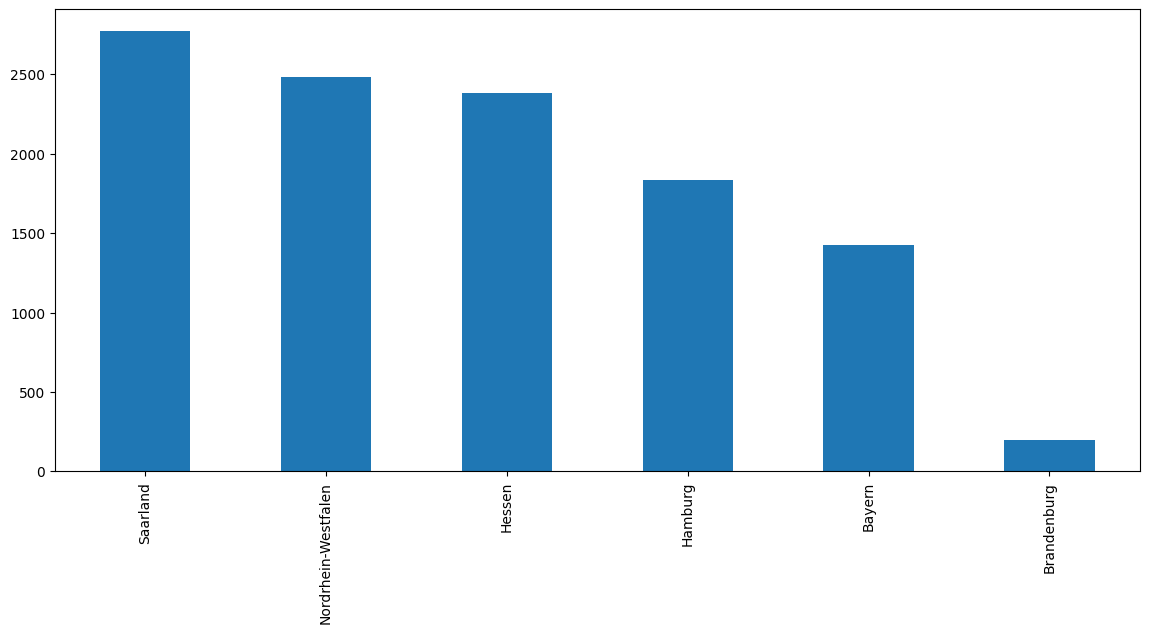

In [100]:
germany_states.plot(kind='bar', figsize=(14,6))

In Canada, Australia, France and Germany, there is a state that is responsible for the majority of sales. The most balanced one is Germany.

In [101]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<Axes: ylabel='Product_Category'>

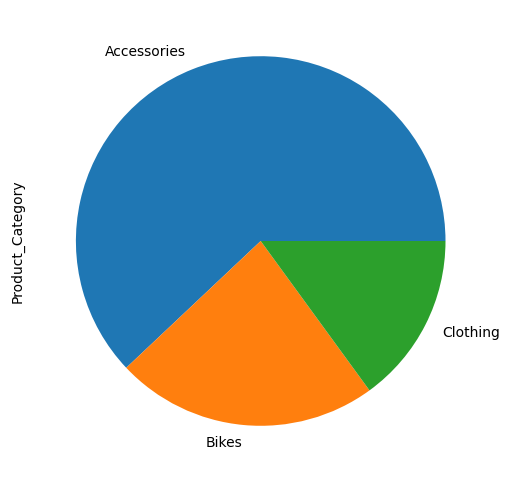

In [102]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

In [103]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<Axes: >

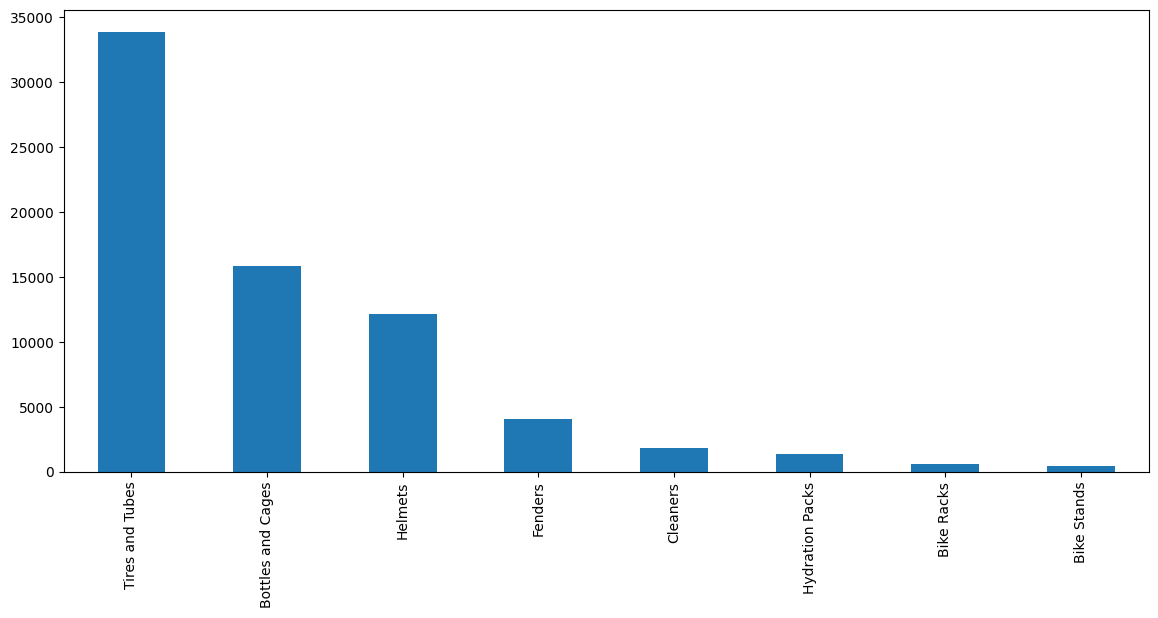

In [104]:
accessories.plot(kind='bar', figsize=(14,6))

Accessories are the most sold products in this store, followed by bikes and clothes.

The best seller accessory are tires and tubes. Bottles and cages follow them, and helmets are third. The others are on another league. 

In [105]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<Axes: ylabel='Sub_Category'>

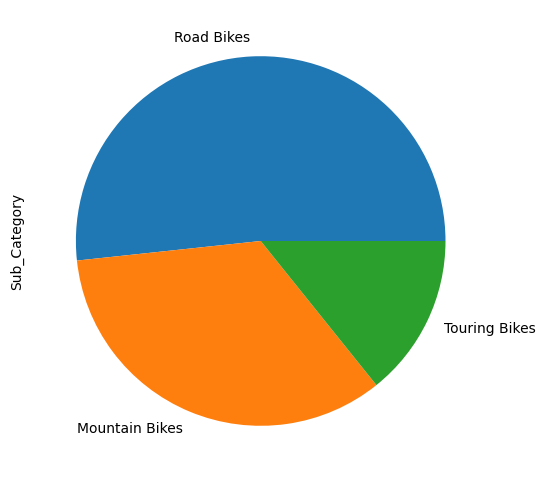

In [107]:
bikes.plot(kind='pie', figsize=(6,6))

Road bike are the best seller among the different types of bikes.

In [109]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<Axes: >

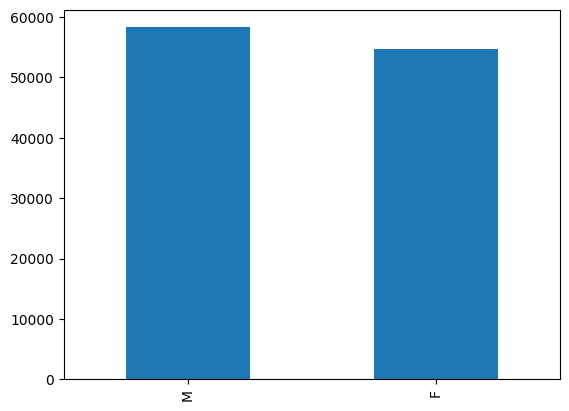

In [110]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

There are more men buyers than female buyers. However, an ANOVA would be an appropriate way to statistically identify the existence of significant differences.

In [111]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-09-30


The most revenue is brought by a guy who made two purchases. They came from Australia (Queensland), the same products (vests). These were made the same day, with 2 a year difference.